In [53]:
# TODO
# drop all complaints outside of date range 2011-2014
# drop complaints that have no incident_date

# convert all to numeric vals
# 

In [5]:
import pandas as pd

FILES = [('allegations', 'data/allegations.csv'), ('cats', 'data/categories.csv'), ('comps', 'data/complainants.csv'),
         ('history', 'data/history.csv'), 
         ('investigators', 'data/investigators.csv'), ('officers', 'data/officers.csv'), ('witnesses', 'data/witnesses.csv')]

In [81]:
df_allegations = pd.read_csv('data/allegations.csv')
df_cats = pd.read_csv('data/categories.csv')
df_comps = pd.read_csv('data/categories.csv')
df_history = pd.read_csv('data/history.csv')
df_invs = pd.read_csv('data/investigators.csv')
df_offs = pd.read_csv('data/officers.csv')
df_witnesses = pd.read_csv('data/witnesses.csv')

/Users/laurendyson/anaconda/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
df_allegations.isnull().sum()

crid                       0
officer_id              8070
cat_id                 13605
recc_finding           49553
recc_outcome           39833
finding_edit               0
outcome_edit               0
value                      0
beat                   28653
location               27799
add1                   35259
add2                   34771
city                   34497
incident_date          27796
start_date             17082
end_date               21397
investigator_id        28433
final_outcome_class        0
dtype: int64

In [61]:
df_allegations_clean = df_allegations[df_allegations['incident_date'].notnull()]

In [96]:
df_allegations_clean['start_date_obj'] = pd.to_datetime(df_allegations_clean['start_date'], infer_datetime_format=True)

In [97]:
df_allegations_clean['end_date_obj'] = pd.to_datetime(df_allegations_clean['end_date'], infer_datetime_format=True)
df_allegations_clean['incident_date_obj'] = pd.to_datetime(df_allegations_clean['incident_date'], infer_datetime_format=True)

In [101]:
df_allegations_clean['incident_date_obj'].dt.year

27796    2012
27797    2013
27798    2011
27799    2011
27800    2011
27801    2012
27802    2011
27803    2011
27804    2011
27805    2012
27806    2012
27807    2012
27808    2014
27809    2013
27810    2012
27811    2011
27812    2011
27813    2012
27814    2012
27815    2013
27816    2014
27817    2012
27818    2012
27819    2012
27820    2012
27821    2013
27822    2013
27823    2014
27824    2012
27825    2012
         ... 
56354    2015
56355    2015
56356    2015
56357    2015
56358    2015
56359    2015
56360    2015
56361    2015
56362    2015
56363    2015
56364    2015
56365    2015
56366    2015
56367    2015
56368    2015
56369    2015
56370    2015
56371    2015
56372    2015
56373    2015
56374    2015
56375    2015
56376    2015
56377    2015
56378    2015
56379    2015
56380    2015
56381    2015
56382    2015
56383    2015
Name: incident_date_obj, dtype: int64

In [108]:
df_allegations_clean = df_allegations_clean[df_allegations_clean['incident_date_obj'].dt.year <= 2014]

In [109]:
df_allegations_clean = df_allegations_clean[df_allegations_clean['incident_date_obj'].dt.year >= 2011]

In [113]:
df_allegations_clean['final_outcome_class'].unique()

array(['not-sustained', 'open-investigation', 'unknown', 'disciplined',
       'sustained'], dtype=object)

In [150]:
import matplotlib.pyplot as plt
import pipeline as pl

OUTCOME_VAR = 'binary_outcome'
INDEX_COL = 0

%matplotlib inline

In [115]:
cols = list(df_allegations_clean.columns)
features = [x for x in cols if x != OUTCOME_VAR]

In [146]:
df_allegations_clean['final_outcome_class'].unique()

array(['not-sustained', 'open-investigation', 'unknown', 'disciplined',
       'sustained'], dtype=object)

In [147]:
def binarize(x):
    if x == 'sustained':
        return 1
    else:
        return 0

In [148]:
df_allegations_clean['binary_outcome'] = df_allegations_clean['final_outcome_class'].apply(binarize)

In [149]:
df_allegations_clean['binary_outcome'].head()

27796    0
27797    0
27798    0
27799    0
27800    0
Name: binary_outcome, dtype: int64

In [151]:
X_train, X_test, y_train, y_test = pl.split_train_test(df_allegations_clean, f1, OUTCOME_VAR, .2)

In [152]:
f1 = ['recc_outcome', 'investigator_id', 'officer_id', 'beat']

In [140]:
df_allegations_clean['recc_outcome'].fillna(0,inplace=True)
df_allegations_clean['investigator_id'].fillna(0,inplace=True)
df_allegations_clean['officer_id'].fillna(0,inplace=True)
df_allegations_clean['beat'].fillna(0,inplace=True)

In [141]:
pl.explore_data(df_allegations_clean)

### Summary Statistics ###
officer_id
count    26150.000000
mean      3277.409101
std       2983.536204
min          0.000000
25%          0.000000
50%       2784.500000
75%       5934.000000
max       8923.000000
Name: officer_id, dtype: float64
Null values: 0

recc_outcome
count    26150.000000
mean       351.426233
std        294.430951
min          0.000000
25%          0.000000
50%        600.000000
75%        600.000000
max        800.000000
Name: recc_outcome, dtype: float64
Null values: 0

beat
count    26150.000000
mean      1057.554226
std        732.994866
min          0.000000
25%        513.000000
50%        911.000000
75%       1524.000000
max       4100.000000
Name: beat, dtype: float64
Null values: 0

add1
count    19281.000000
mean      4485.647010
std       3063.203246
min        100.000000
25%       1702.000000
50%       4200.000000
75%       6735.000000
max      20027.000000
Name: add1, dtype: float64
Null values: 6869

investigator_id
count    26150.000000
mean    

In [153]:
clfs,grid = pl.define_clfs_params()

In [154]:
clfs_to_try = ['LR']

###
LR
###

Time: 2s
Accuracy: 0.99
ROC/AUC Score: 0.5
Classication Report:
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      5191
          1       0.00      0.00      0.00        39

avg / total       0.99      0.99      0.99      5230




/Users/laurendyson/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


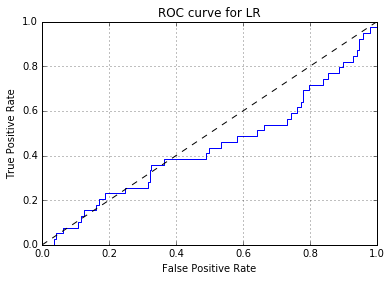

In [155]:
results = pl.try_models(clfs_to_try,clfs,grid, X_train, y_train, X_test, y_test)

In [156]:
df_allegations_clean.head()

,crid,officer_id,cat_id,recc_finding,recc_outcome,finding_edit,outcome_edit,value,beat,location,...,city,incident_date,start_date,end_date,investigator_id,final_outcome_class,start_date_obj,end_date_obj,incident_date_obj,binary_outcome
27796,1057642,1,10B,UN,600,Unfounded,Unsustained,0,114,11,...,CHICAGO IL,2012-10-07 07:30,2012-10-09,2013-05-16,1393,not-sustained,2012-10-09,2013-05-16,2012-10-07 07:30:00,0
27797,1063196,1,10U,NaN,600,No Affidavit,Unsustained,0,1423,17,...,CHICAGO IL,2013-06-29 19:00,2013-06-29,2013-08-14,1060,not-sustained,2013-06-29,2013-08-14,2013-06-29 19:00:00,0
27798,1047453,2,10V,NS,600,Not Sustained,Unsustained,0,1131,19,...,NaN,2011-06-24 17:00,2011-08-04,2012-07-30,583,not-sustained,2011-08-04,2012-07-30,2011-06-24 17:00:00,0
27799,1049623,2,05B,UN,600,Unfounded,Unsustained,0,1524,17,...,CHICAGO IL 60644,2011-10-27 16:00,2011-10-27,2012-07-06,275,not-sustained,2011-10-27,2012-07-06,2011-10-27 16:00:00,0
27800,1049701,2,06J,NS,600,Not Sustained,Unsustained,0,1513,17,...,CHICAGO IL 60644,2011-10-26 00:00,2011-10-31,2012-12-20,740,not-sustained,2011-10-31,2012-12-20,2011-10-26 00:00:00,0
